# Library Decleration

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
db = pd.read_csv('new_model.csv')
db.head()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


In [9]:
db.rename(columns={
    'Bp': 'Blood_Pressure',
    'Sg': 'Specific_Gravity',
    'Al': 'Albumin',
    'Su': 'Sugar',
    'Rbc': 'Red_Blood_Cells',
    'Bu': 'Blood_Urea',
    'Sc': 'Serum_Creatinine',
    'Sod': 'Sodium',
    'Pot': 'Potassium',
    'Hemo': 'Hemoglobin',
    'Wbcc': 'White_Blood_Cell_Count',
    'Rbcc': 'Red_Blood_Cell_Count',
    'Htn': 'Hypertension',
    'Class': 'CKD_Class'
}, inplace=True)


In [10]:
db.head()

,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Red_Blood_Cells,Blood_Urea,Serum_Creatinine,Sodium,Potassium,Hemoglobin,White_Blood_Cell_Count,Red_Blood_Cell_Count,Hypertension,CKD_Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


In [11]:
db.shape

(400, 14)

In [12]:
print("""
No of columns: {}
No of rows: {}
No of categorical columns: {}
No of numerical columns: {}""".format(db.shape[1], 
                                      db.shape[0],
                                      len(db.select_dtypes('O').columns),
                                      len(db.select_dtypes(['int', 'float']).columns)))


No of columns: 14
No of rows: 400
No of categorical columns: 0
No of numerical columns: 14


In [13]:
db.describe()

,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Red_Blood_Cells,Blood_Urea,Serum_Creatinine,Sodium,Potassium,Hemoglobin,White_Blood_Cell_Count,Red_Blood_Cell_Count,Hypertension,CKD_Class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,76.455000,1.017712,1.015000,0.395000,0.882500,57.40550,3.07235,137.529025,4.627850,12.526900,8406.090000,4.708275,0.369350,0.625000
std,13.476536,0.005434,1.272329,1.040038,0.322418,49.28597,5.61749,9.204273,2.819783,2.716171,2523.219976,0.840315,0.482023,0.484729
min,50.000000,1.005000,0.000000,0.000000,0.000000,1.50000,0.40000,4.500000,2.500000,3.100000,2200.000000,2.100000,0.000000,0.000000
25%,70.000000,1.015000,0.000000,0.000000,1.000000,27.00000,0.90000,135.000000,4.000000,10.875000,6975.000000,4.500000,0.000000,0.000000
50%,78.000000,1.020000,1.000000,0.000000,1.000000,44.00000,1.40000,137.530000,4.630000,12.530000,8406.000000,4.710000,0.000000,1.000000
75%,80.000000,1.020000,2.000000,0.000000,1.000000,61.75000,3.07000,141.000000,4.800000,14.625000,9400.000000,5.100000,1.000000,1.000000
max,180.000000,1.025000,5.000000,5.000000,1.000000,391.00000,76.00000,163.000000,47.000000,17.800000,26400.000000,8.000000,1.000000,1.000000


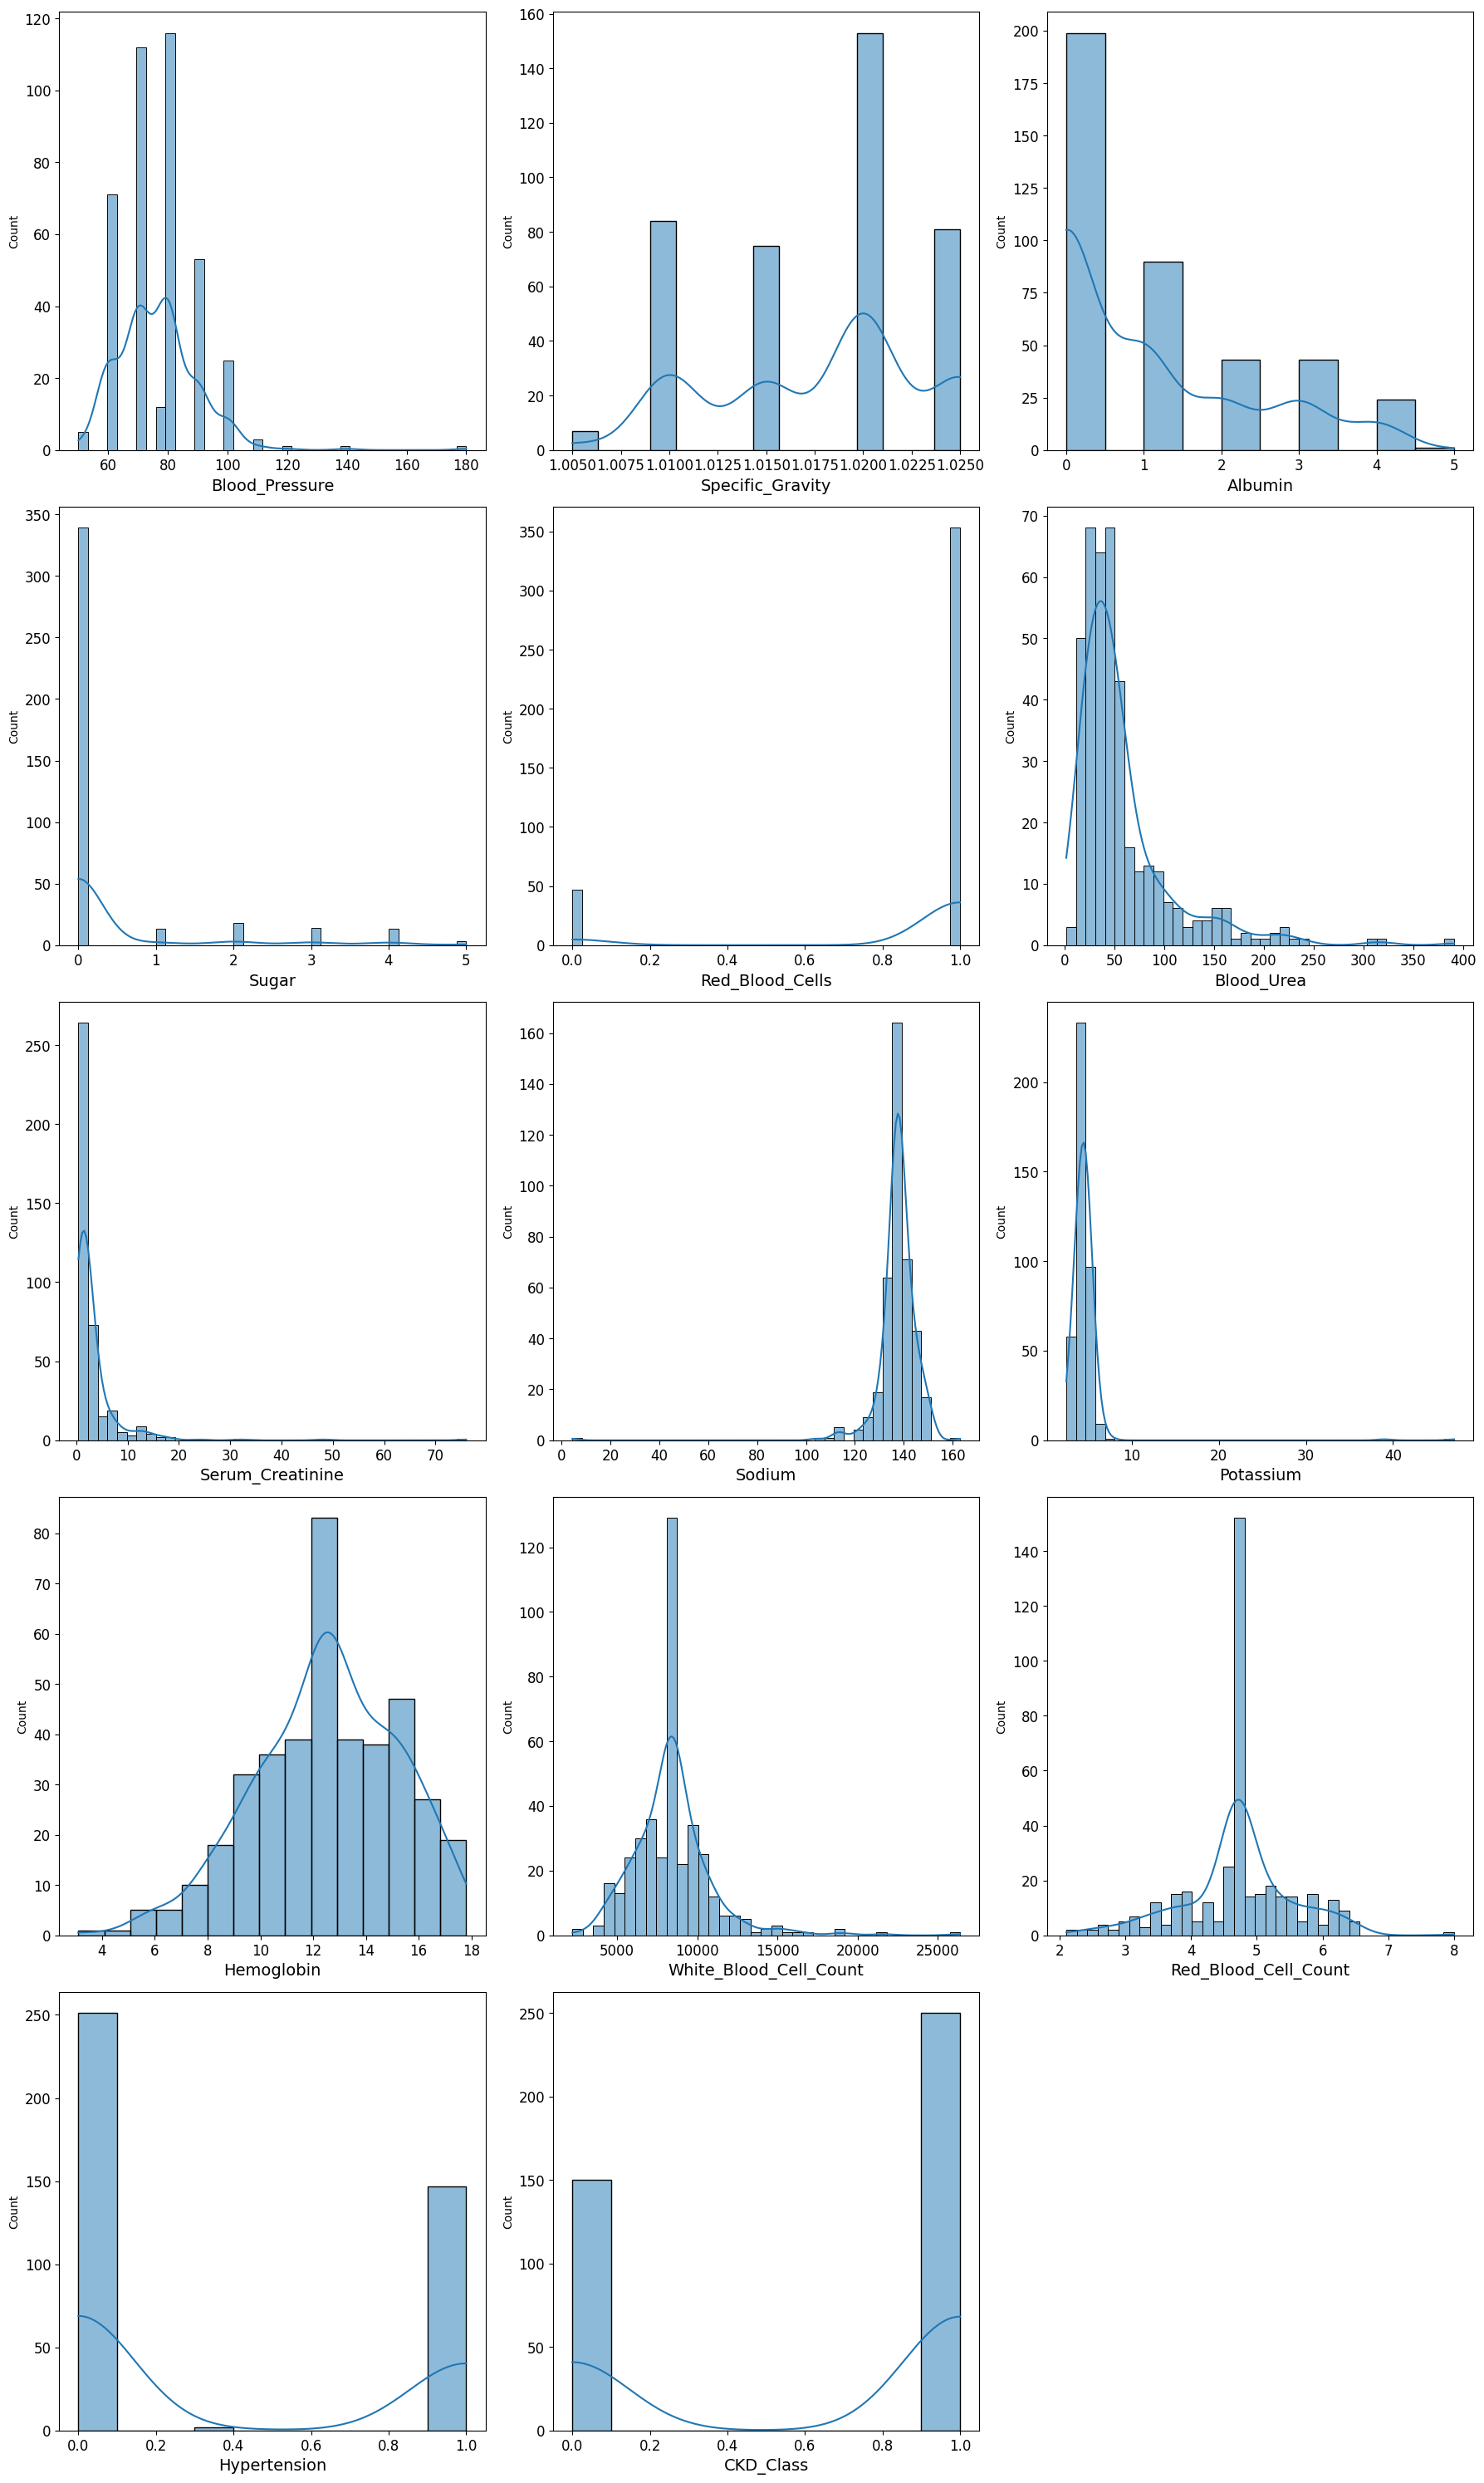

In [ ]:
def plot_distribution(data, features):
    col = 3
    row = int(np.ceil(len(features) / col))
    fig, axes = plt.subplots(row, col, figsize=(18, 6 * row))  # Adjust height

    axes = axes.flatten()  

    for i, feature in enumerate(features):
        sns.histplot(data[feature].dropna(), ax=axes[i], kde=True)
        axes[i].set_xlabel(feature, fontsize=14)
        axes[i].tick_params(axis='x', labelsize=12)
        axes[i].tick_params(axis='y', labelsize=12)

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_distribution(db, db.columns)